# 셀프 주유소는 정말 저렴할까 ?

> 셀프 주유소는 정말 저렴한가? 
* 의견, 가설, 사실을 데이터로 표현하고 검증하는 것도 데이터 분석가가 하는 일 
* 주유소/ 충전소 찾기 
* 지역 정보 선택 * 조회 버튼 누름 

![img](images/Opinet.JPG)

## Selenium 사용하기 - Naver 

> 4-1 Selenium 사용하기 
* <code> from selenium import webdriver </code>
* Folder : "C:/Users/Sung/Downloads/chromedriver.exe

> 참고사항 
* Tab 누르면 자동완성 (not space bar) 

In [13]:
from selenium import webdriver
driver = webdriver.Chrome("C:/Users/Sung/Downloads/chromedriver.exe")
driver.get("http://naver.com") # 네이버 접속  

# save_screenshot 화면 캡처, 경로에서 사용한 images 폴더는 미리 만들어둬야 함 
driver.save_screenshot("C:/Users/Sung/Downloads/images/001.jpg") 

login = driver.find_element_by_css_selector ('#account > a')
login.click()

In [14]:
# Naver 로그인 
naver_id = driver.find_element_by_id("id")
naver_id.clear() # 입력창의 정보 지움 
naver_id.send_keys("id") # id input 

naver_pwd = driver.find_element_by_id("pw")
naver_pwd.clear()
naver_pwd.send_keys("password")

enter = """//*[@id="log.login"]""" # Xpath , 우리가 접근해야 할 로그인 버튼의 위치 
driver.find_element_by_xpath(enter).click() # 로그인 버튼의 위치 알고, 클릭 

In [16]:
# Naver Mail에 접속 
driver.get("http://mail.naver.com")

In [18]:
# Naver Mail 페이지 내용 읽어옴 
from bs4 import BeautifulSoup

html = driver.page_source # selenium 이 접근한 페이지 소스를 받을 수 있ㅇ므 
soup = BeautifulSoup(html, "html.parser")

In [24]:
# Naver Mail 보낸 사람 리스트 확인 
# 태그 <div class="name _ccr(lst.from) "><span class="blind">보낸 이:</span><a title="&quot;쿠팡&quot; <no_reply@coupang.com>" class="_c1(myContextMenu|showSenderContextLayer|list|41571) _stopDefault" href="#">쿠팡</a></div>
raw_list= soup.find_all("div", "name _ccr(lst.from)")
raw_list 

[<div class="name _ccr(lst.from)"><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|showSenderContextLayer|list|41571) _stopDefault" href="#" title='"쿠팡" &lt;no_reply@coupang.com&gt;'>쿠팡</a></div>,
 <div class="name _ccr(lst.from)"><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|showSenderContextLayer|list|41570) _stopDefault" href="#" title='"mgram" &lt;noreply@mgram.me&gt;'>mgram</a></div>,
 <div class="name _ccr(lst.from)"><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|showSenderContextLayer|list|41569) _stopDefault" href="#" title='"리디북스" &lt;noreply@ridibooks.com&gt;'>리디북스</a></div>,
 <div class="name _ccr(lst.from)"><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|showSenderContextLayer|list|41568) _stopDefault" href="#" title='"토스 전자결제" &lt;bill@tosspayments.com&gt;'>토스 전자결제</a></div>,
 <div class="name _ccr(lst.from)"><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|showSenderContextLayer|list|41567) _stopDefault" href="#

In [29]:
send_list = [raw_list[n].find('a').get_text() for n in range(0, len(raw_list))]
send_list 
len(send_list)

80

In [30]:
send_list

['쿠팡',
 'mgram',
 '리디북스',
 '토스 전자결제',
 'HoneyColor',
 '쿠팡',
 '링커리어',
 '사람인 | 기업연구소',
 'Evernote',
 'YuriGagarine',
 'YuriGagarine',
 'YuriGagarine',
 'NYC Events',
 'FashionNova',
 '한국정보통신 KICC',
 'Michael Kors',
 'Glassdoor',
 'Praful932',
 'Ayush Gupta',
 '잡코리아 | 스마트매..',
 'BBQ멤버십서비스',
 '쿠팡',
 'Investing.com',
 'd5423197',
 'One To World',
 'd5423197',
 'Michael Kors',
 'The Epoch Times',
 'Tumblr',
 'Praful932',
 '잡코리아 | 스마트매..',
 'Dseal95',
 'Dseal95',
 'Dseal95',
 '한국정보통신 KICC',
 '쿠팡',
 'Instagram',
 '사람인 | 기업연구소',
 '260 Sample Sale',
 '260 Sample Sale',
 'Glassdoor News',
 'Michael Kors',
 'HoneyColor',
 '잡코리아 | 스마트매..',
 'EnglishCentral',
 'Glassdoor Jobs',
 '쿠팡',
 'Investing.com',
 'LinkedIn',
 'New York Zipline Adv..',
 'NY Events',
 '260 Sample Sale',
 'LinkedIn',
 'Forever 21',
 '링커리어',
 'Google Play',
 '잡코리아 | 스마트매..',
 '사람인 | 기업연구소',
 'Crispy13',
 '쿠팡',
 'LinkedIn',
 '사람인 | 기업연구소',
 '온라인무료교육',
 'One To World',
 'LinkedIn',
 'review-notebook-a..',
 'Ian Beauregard',
 '李锋',


In [28]:
# 보낸 사람 unique 값 리스트 찾기
unique = list(set(send_list)) 
len(unique)

43

In [31]:
unique

['온라인무료교육',
 'NYC Events',
 'ONOFFMIX',
 '리디북스',
 'LinkedIn',
 'YuriGagarine',
 'Glassdoor',
 'Ayush Gupta',
 'EnglishCentral',
 '쿠팡',
 '토스 전자결제',
 '사람인 | 기업연구소',
 '260 Sample Sale',
 'd5423197',
 '잡코리아 | 스마트매..',
 '李锋',
 'Praful932',
 'Google Play',
 'Investing.com',
 '케이뱅크',
 'Instagram',
 'FashionNova',
 'One To World',
 'Crispy13',
 'NY Events',
 'mgram',
 'BBQ멤버십서비스',
 '알라딘 인터넷서점',
 'Dseal95',
 'The Epoch Times',
 'Tumblr',
 'HoneyColor',
 'Evernote',
 'review-notebook-a..',
 'Ian Beauregard',
 'Michael Kors',
 'Inflearn',
 'New York Zipline Adv..',
 '링커리어',
 'Glassdoor News',
 'Forever 21',
 'Glassdoor Jobs',
 '한국정보통신 KICC']

In [32]:
# 크롬 드라이버 종료 
driver.close()

## 서울시 구별 주유소 가격 정보 얻기

> selnium 참고 site 
* https://fenderist.tistory.com/168

In [60]:
from selenium import webdriver
driver = webdriver.Chrome("C:/Users/Sung/Downloads/chromedriver.exe")
driver.get("http://www.opinet.co.kr") # 네이버 접속  

In [61]:
# 싼 주유소 찾기  
# http://www.opinet.co.kr/searRgSelect.do -> 작동 안함, javascript 로 막음 
driver.execute_script("return goSubPage(0,0,99)")

In [65]:
# 시군구 리스트 
gu_list_raw = driver.find_element_by_xpath("""//*[@id="SIGUNGU_NM0"]""")
# find_elements (find_all) / find_element (find)
gu_list = gu_list_raw.find_elements_by_tag_name("option") # 하위 option tag 

# 시군구 네임 가져오기 
gu_names = [option.get_attribute("value") for option in gu_list]
gu_names.remove('')
gu_names

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [63]:
# 시군구 네임 가져오기 
gu_names = [option.get_attribute("value") for option in gu_list]
gu_names.remove('')
gu_names

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [64]:
# 깅님그 산텍 
element = driver.find_element_by_id("SIGUNGU_NM0")
element.send_keys(gu_names[0])

In [67]:
# 조회 버튼 
xpath = """//*[@id="searRgSelect"]/span"""
element_sel_gu = driver.find_element_by_xpath(xpath).click()

In [ ]:
# 엑셀 저장 

In [69]:
xpath = """//*[@id="glopopd_excel"]/span"""
element_get_excel = driver.find_element_by_xpath(xpath).click()

In [72]:
# !pip install tqdm

In [74]:
# 지역별 주유소 찾기 
import time 
from tqdm import tqdm_notebook

for gu in tqdm_notebook(gu_names):
    # 구 입력 
    element = driver.find_element_by_id("SIGUNGU_NM0")
    element.send_keys(gu)
    
    time.sleep(2)
    
    # 조회 버튼 
    xpath = """//*[@id="searRgSelect"]/span"""
    element_sel_gu = driver.find_element_by_xpath(xpath).click()
    
    time.sleep(1)
    
    # 엑셀 저장 
    xpath = """//*[@id="glopopd_excel"]/span"""
    element_get_excel = driver.find_element_by_xpath(xpath).click()
    
    time.sleep(1)

c:\users\sung\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


In [75]:
# 드라이버 종료 
driver.close() 

## 구별 주유 가격에 대한 데이터의 정리 

In [77]:
import pandas as pd 
from glob import glob # 파일 경로를 쉽게 접근할 수 있게 해주는 모듈 

In [80]:
# /data 폴더 안에  # 지역으로 시작하는 # xls 파일 전체를 의미 
glob("C:/Users/Sung/Downloads/data/지역*.xls") 

['C:/Users/Sung/Downloads/data\\지역_위치별(주유소) (1).xls',
 'C:/Users/Sung/Downloads/data\\지역_위치별(주유소) (10).xls',
 'C:/Users/Sung/Downloads/data\\지역_위치별(주유소) (11).xls',
 'C:/Users/Sung/Downloads/data\\지역_위치별(주유소) (12).xls',
 'C:/Users/Sung/Downloads/data\\지역_위치별(주유소) (13).xls',
 'C:/Users/Sung/Downloads/data\\지역_위치별(주유소) (14).xls',
 'C:/Users/Sung/Downloads/data\\지역_위치별(주유소) (15).xls',
 'C:/Users/Sung/Downloads/data\\지역_위치별(주유소) (16).xls',
 'C:/Users/Sung/Downloads/data\\지역_위치별(주유소) (17).xls',
 'C:/Users/Sung/Downloads/data\\지역_위치별(주유소) (18).xls',
 'C:/Users/Sung/Downloads/data\\지역_위치별(주유소) (19).xls',
 'C:/Users/Sung/Downloads/data\\지역_위치별(주유소) (2).xls',
 'C:/Users/Sung/Downloads/data\\지역_위치별(주유소) (20).xls',
 'C:/Users/Sung/Downloads/data\\지역_위치별(주유소) (21).xls',
 'C:/Users/Sung/Downloads/data\\지역_위치별(주유소) (22).xls',
 'C:/Users/Sung/Downloads/data\\지역_위치별(주유소) (23).xls',
 'C:/Users/Sung/Downloads/data\\지역_위치별(주유소) (24).xls',
 'C:/Users/Sung/Downloads/data\\지역_위치별(주유소) (25).xls',
 'C:/Users/S

In [81]:
# station_files 변수에 각 엑셀 파일의 경로와 이름을 리스트로 저장 
station_files = glob("C:/Users/Sung/Downloads/data/지역*.xls")
station_files

['C:/Users/Sung/Downloads/data\\지역_위치별(주유소) (1).xls',
 'C:/Users/Sung/Downloads/data\\지역_위치별(주유소) (10).xls',
 'C:/Users/Sung/Downloads/data\\지역_위치별(주유소) (11).xls',
 'C:/Users/Sung/Downloads/data\\지역_위치별(주유소) (12).xls',
 'C:/Users/Sung/Downloads/data\\지역_위치별(주유소) (13).xls',
 'C:/Users/Sung/Downloads/data\\지역_위치별(주유소) (14).xls',
 'C:/Users/Sung/Downloads/data\\지역_위치별(주유소) (15).xls',
 'C:/Users/Sung/Downloads/data\\지역_위치별(주유소) (16).xls',
 'C:/Users/Sung/Downloads/data\\지역_위치별(주유소) (17).xls',
 'C:/Users/Sung/Downloads/data\\지역_위치별(주유소) (18).xls',
 'C:/Users/Sung/Downloads/data\\지역_위치별(주유소) (19).xls',
 'C:/Users/Sung/Downloads/data\\지역_위치별(주유소) (2).xls',
 'C:/Users/Sung/Downloads/data\\지역_위치별(주유소) (20).xls',
 'C:/Users/Sung/Downloads/data\\지역_위치별(주유소) (21).xls',
 'C:/Users/Sung/Downloads/data\\지역_위치별(주유소) (22).xls',
 'C:/Users/Sung/Downloads/data\\지역_위치별(주유소) (23).xls',
 'C:/Users/Sung/Downloads/data\\지역_위치별(주유소) (24).xls',
 'C:/Users/Sung/Downloads/data\\지역_위치별(주유소) (25).xls',
 'C:/Users/S

In [85]:
# 파일 한개 가져오기 
tmp_raw = []
tmp = pd.read_excel('C:/Users/Sung/Downloads/data\\지역_위치별(주유소) (1).xls', header = 2) # header 는 3번째 줄에 있음 
tmp_raw.append(tmp)
tmp_raw

[       지역                     상호                         주소      상표  \
 0   서울특별시            (주)보성 세곡주유소      서울 강남구  헌릉로 731 (세곡동)   SK에너지   
 1   서울특별시       GS칼텍스(주)직영 산성주유소             서울 강남구 헌릉로 730   GS칼텍스   
 2   서울특별시         현대오일뱅크 도곡셀프주유소  서울 강남구  남부순환로 2718 (도곡2동)  현대오일뱅크   
 3   서울특별시               오일프러스 셀프    서울 강남구 남부순환로 2651 (도곡동)   SK에너지   
 4   서울특별시                  방죽주유소      서울 강남구 밤고개로 215 (율현동)   S-OIL   
 5   서울특별시        현대오일뱅크(주) 유진주유소       서울 강남구 논현로 152 (도곡동)  현대오일뱅크   
 6   서울특별시                자곡셀프주유소      서울 강남구 밤고개로 120 (자곡동)   SK에너지   
 7   서울특별시          지에스칼텍스㈜ 은마주유소            서울 강남구 영동대로 235   GS칼텍스   
 8   서울특별시                SK서광주유소       서울 강남구 역삼로 142 (역삼동)   SK에너지   
 9   서울특별시             (주)선진도곡주유소       서울 강남구 도곡로 162 (도곡동)   S-OIL   
 10  서울특별시                  역삼주유소       서울 강남구 역삼로 205 (역삼동)   GS칼텍스   
 11  서울특별시        에쓰-오일㈜직영 개나리주유소       서울 강남구 언주로 423 (역삼동)   S-OIL   
 12  서울특별시         SK에너지(주) 매봉주유소             서울 강남구 언주로 307   S

> 파일 여러개 가져오기 
* read_excel 로 각 파일을 읽은 후 
* tmp_raw 변수에 append 
* 반복문 끝나면 pd.concat 명령으로 쉽게 하나로 합침 
* 25개 엑셀 파일 하나로 합침 

In [88]:
len(station_files)

25

In [92]:
# 파일 여러개 가져오기 
tmp_raw = []
for file_name in station_files:
    tmp = pd.read_excel(file_name, header = 2) # header 는 3번째 줄에 있음 
    tmp_raw.append(tmp)

station_raw = pd.concat(tmp_raw)

In [93]:
station_raw.info() 
# 가격 정보가 숫자형(int, float) 아니어서 나중에 처리해야 함 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 14
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      499 non-null    object
 1   상호      499 non-null    object
 2   주소      499 non-null    object
 3   상표      499 non-null    object
 4   전화번호    499 non-null    object
 5   셀프여부    499 non-null    object
 6   고급휘발유   499 non-null    object
 7   휘발유     499 non-null    object
 8   경유      499 non-null    object
 9   실내등유    499 non-null    object
dtypes: object(10)
memory usage: 42.9+ KB


In [94]:
station_raw.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),SK에너지,02-445-6870,Y,-,1375,1175,-
1,서울특별시,GS칼텍스(주)직영 산성주유소,서울 강남구 헌릉로 730,GS칼텍스,02-2226-4963,Y,-,1385,1195,-
2,서울특별시,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),현대오일뱅크,02-529-5101,Y,1547,1394,1189,-
3,서울특별시,오일프러스 셀프,서울 강남구 남부순환로 2651 (도곡동),SK에너지,02-3462-5100,Y,1547,1394,1189,-
4,서울특별시,방죽주유소,서울 강남구 밤고개로 215 (율현동),S-OIL,02-459-3434,Y,-,1399,1199,-


In [98]:
# 원하는 컬럼 가지고 오고 이름도 다시 정의 stations 라는 변수에 저장 
stations = pd.DataFrame({"Oil_store": station_raw["상호"],
                           "주소": station_raw["주소"],
                           "가격": station_raw["휘발유"],
                           "셀프": station_raw["셀프여부"],
                           "상표": station_raw["상표"] })
stations.head()

,Oil_store,주소,가격,셀프,상표
0,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),1375,Y,SK에너지
1,GS칼텍스(주)직영 산성주유소,서울 강남구 헌릉로 730,1385,Y,GS칼텍스
2,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),1394,Y,현대오일뱅크
3,오일프러스 셀프,서울 강남구 남부순환로 2651 (도곡동),1394,Y,SK에너지
4,방죽주유소,서울 강남구 밤고개로 215 (율현동),1399,Y,S-OIL


> 구 이름 추출 
<code>
    eachAddress = "서울 강남구 현릉로 731(세곡동)"
    eachAddress.split() 
</code>
* ['서울', '강남구', '현릉로', '731(세곡동)']
* eachAddress.split()[1] -> 강남구  # 2번째 자리 

In [101]:
eachAddress = "서울 강남구 현릉로 731(세곡동)"
eachAddress.split() 

['서울', '강남구', '현릉로', '731(세곡동)']

In [102]:
# 구 이름 추출 
stations['구']  = [eachAddress.split()[1] for eachAddress in stations["주소"]] 
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),1375,Y,SK에너지,강남구
1,GS칼텍스(주)직영 산성주유소,서울 강남구 헌릉로 730,1385,Y,GS칼텍스,강남구
2,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),1394,Y,현대오일뱅크,강남구
3,오일프러스 셀프,서울 강남구 남부순환로 2651 (도곡동),1394,Y,SK에너지,강남구
4,방죽주유소,서울 강남구 밤고개로 215 (율현동),1399,Y,S-OIL,강남구


In [103]:
# unique() 검사 
stations["구"].unique() # 잘 뽑혔는지 확인 

array(['강남구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구',
       '송파구', '양천구', '강동구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구',
       '강북구', '강서구', '관악구', '광진구', '구로구', '금정구', '금천구', '노원구'],
      dtype=object)

In [105]:
# 강남구
stations[stations["구"] == "강남구"]

,Oil_store,주소,가격,셀프,상표,구
0,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),1375,Y,SK에너지,강남구
1,GS칼텍스(주)직영 산성주유소,서울 강남구 헌릉로 730,1385,Y,GS칼텍스,강남구
2,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),1394,Y,현대오일뱅크,강남구
3,오일프러스 셀프,서울 강남구 남부순환로 2651 (도곡동),1394,Y,SK에너지,강남구
4,방죽주유소,서울 강남구 밤고개로 215 (율현동),1399,Y,S-OIL,강남구
5,현대오일뱅크(주) 유진주유소,서울 강남구 논현로 152 (도곡동),1408,N,현대오일뱅크,강남구
6,자곡셀프주유소,서울 강남구 밤고개로 120 (자곡동),1410,Y,SK에너지,강남구
7,지에스칼텍스㈜ 은마주유소,서울 강남구 영동대로 235,1415,N,GS칼텍스,강남구
8,SK서광주유소,서울 강남구 역삼로 142 (역삼동),1415,Y,SK에너지,강남구
9,(주)선진도곡주유소,서울 강남구 도곡로 162 (도곡동),1415,N,S-OIL,강남구


> if 서울특별시로 잘못 뽑힌 경우 
* <code> stations[stations["구"] == "서울특별시"] </code>
* 구가 서울특별시로 들어간 애들은 구를 성동구로 바꾸는 코드 
* <code> stations.loc[stations["구"] == "서울특별시", "구"] =="성동구"</code>

> if 특별시로 잘못 뽑힌 경우 
* <code> stations[stations["구"] == "특별시"] </code>
* 구가 특별시로 들어간 애들은 구를 도봉구로 바꾸는 코드 
* <code> stations.loc[stations["구"] == "특별시", "구"] =="도봉구"</code>

In [110]:
stations[stations["구"] == "특별시"]  # 없음 

,Oil_store,주소,가격,셀프,상표,구


* **
> 가격을 object 로 인식하는 문제 
* 1. 가격에 - 이 포함되는 경우 확인 
* 2. 정보가 기입되지 않은 주유소는 대상에서 제외 
* 3. 정보를 숫자형으로 변환 

In [112]:
# * 1. 가격에 - 이 포함되는 경우 확인 
stations["가격"].unique()

array(['1375', '1385', '1394', '1399', '1408', '1410', '1415', '1435',
       '1441', '1448', '1453', '1461', '1498', '1527', '1550', '1586',
       '1637', '1638', '1698', '1777', '1779', '1788', '1845', '1848',
       '1883', '1913', '2025', '-', 1290, 1295, 1305, 1319, 1327, 1330,
       1338, 1339, 1353, 1355, 1395, 1399, 1418, 1557, 1292, 1298, 1325,
       1329, 1345, 1347, 1348, 1359, 1369, 1398, 1438, 1499, 1563, 1358,
       1378, 1379, 1389, 1429, 1495, '1367', '1377', '1398', '1436',
       '1438', '1574', '1679', '1697', 1354, 1375, '1288', '1395', '1396',
       '1400', '1405', '1409', '1417', '1419', '1422', '1428', '1429',
       '1439', '1442', '1462', '1497', '1539', '1682', '1877', 1308, 1365,
       1390, 1394, 1445, 1448, 1468, 1470, 1496, 1595, 1685, 1698, 1705,
       1275, 1285, 1299, 1317, 1324, 1335, 1337, 1349, 1391, 1414, 1457,
       1368, 1382, 1383, 1387, 1388, 1393, 1397, 1407, 1409, 1422, 1427,
       1629, 1274, 1306, 1316, 1385, 1439, 1599, 1677, 1415,

In [111]:
stations[stations["가격"] == "-"]

,Oil_store,주소,가격,셀프,상표,구
39,삼성주유소,서울 강남구 삼성로 521 (삼성동),-,N,SK에너지,강남구
40,동우주유소,서울특별시 강남구 봉은사로 311 (논현동),-,N,SK에너지,강남구
12,서강주유소,서울 마포구 독막로 134 (창전동),-,N,SK에너지,마포구
33,중앙주유소,서울 서초구 양재동 바우뫼로 219 (양재동),-,N,S-OIL,서초구
34,전당앞주유소,서울 서초구 남부순환로 2391 (서초동),-,N,SK에너지,서초구
35,경일석유(주)직영 삼방주유소,서울 서초구 사평대로 364 (서초동),-,N,GS칼텍스,서초구
31,성락주유소,서울 영등포구 가마산로 414 (신길동),-,Y,S-OIL,영등포구
16,삼융주유소,서울 은평구 수색로 299 (수색동),-,N,SK에너지,은평구
14,양지진흥개발(주)상계주유소,서울 노원구 노해로 527 (상계동),-,N,SK에너지,노원구


In [113]:
# * 2. 정보가 기입되지 않은 주유소는 대상에서 제외 
stations = stations[stations["가격"] != '-']
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),1375,Y,SK에너지,강남구
1,GS칼텍스(주)직영 산성주유소,서울 강남구 헌릉로 730,1385,Y,GS칼텍스,강남구
2,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),1394,Y,현대오일뱅크,강남구
3,오일프러스 셀프,서울 강남구 남부순환로 2651 (도곡동),1394,Y,SK에너지,강남구
4,방죽주유소,서울 강남구 밤고개로 215 (율현동),1399,Y,S-OIL,강남구


In [114]:
# * 3. 정보를 숫자형으로 변환 
stations["가격"] = [float(value) for value in stations["가격"]]

In [117]:
stations.info() # 가격 정보가 float 으로 바뀜 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Oil_store  490 non-null    object 
 1   주소         490 non-null    object 
 2   가격         490 non-null    float64
 3   셀프         490 non-null    object 
 4   상표         490 non-null    object 
 5   구          490 non-null    object 
dtypes: float64(1), object(5)
memory usage: 23.1+ KB


In [116]:
stations.reset_index(inplace = True) # 인덱스를 처음부터 다시 기록하도록 함 
del stations["index"] # index 라는 컬럼이 하나 더 생성되어, 그 부분 제거 

In [118]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Oil_store  490 non-null    object 
 1   주소         490 non-null    object 
 2   가격         490 non-null    float64
 3   셀프         490 non-null    object 
 4   상표         490 non-null    object 
 5   구          490 non-null    object 
dtypes: float64(1), object(5)
memory usage: 23.1+ KB


## 셀프 주유소는 정말 저렴한지 boxplot으로 확인하기

In [119]:
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [120]:
import platform 
path = "C:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == "Darwin": 
    rc("font", family =" AppleGothic")
elif platform.system() == "Windows": 
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc("font", family = font_name)
else: 
    print("Unknown System... sorry")

> 박스 플롯 기준으로 셀프 컬럼 기준으로 가격 분포 확인 
* 전반적으로 셀프 주유소인 경우가 가격이 낮게 되어 있음 

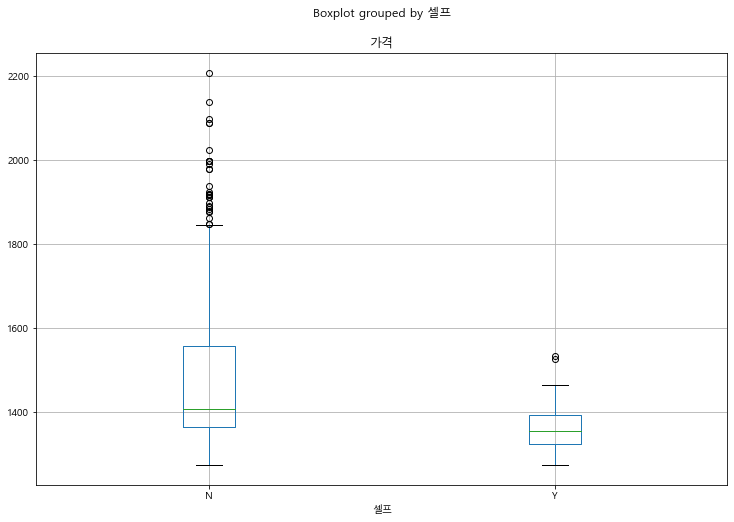

In [126]:
stations.boxplot(column ="가격", by="셀프", figsize =(12,8));

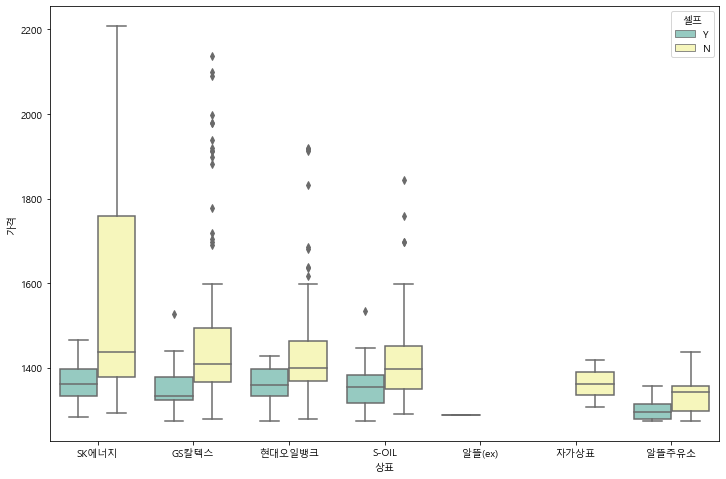

In [133]:
plt.figure(figsize =(12,8))
ax = sns.boxplot(x = "상표", y="가격", hue= "셀프", data = stations, palette= "Set3")
plt.show()

> 결과 
* 노란색이 일반 주유소 
* 초록색이 셀프 주유소인데 
* 다들 비슷한데, 중앙값이 제일 낮은건 GS 칼텍스 (평균적으로 GS가 가격 제일 낮음)

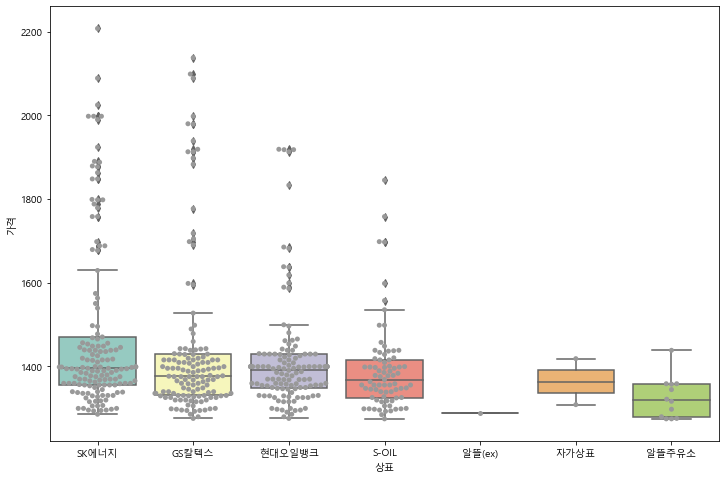

In [135]:
plt.figure(figsize = (12,8))
sns.boxplot(x = "상표", y ="가격", data= stations, palette ="Set3")
sns.swarmplot(x ="상표", y="가격", data = stations, color = ".6")
plt.show()

> 결과 
* 전반적으로는 SK 에너지가 높은 가격대를 형성 

# 여기서부터는 점심시간

## 서울시 

!pip install googlemaps
!pip install folium
오류때문에 cmd 창에서 
<code> python -m pip install folium </code>
<code> python -m pip install googlemaps </code>

In [161]:
import json 
import folium
import googlemaps
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [164]:
# 서울시 가장 비싼 주유소 10곳 
stations.sort_values(by="가격", ascending = False).head(10) # 내림차순 

,Oil_store,주소,가격,셀프,상표,구
344,서남주유소,서울 중구 통일로 30,2208.0,N,SK에너지,중구
343,에스씨(주) 역전주유소,서울 중구 퇴계로 15,2138.0,N,GS칼텍스,중구
342,필동주유소,서울 중구 퇴계로 196 (필동2가),2099.0,N,GS칼텍스,중구
341,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2089.0,N,SK에너지,중구
308,서계주유소,서울 용산구 청파로 367 (서계동),2089.0,N,GS칼텍스,용산구
38,뉴서울(강남),서울 강남구 언주로 716 (논현동),2025.0,N,SK에너지,강남구
306,에너비스,서울 용산구 한남대로 82 (한남동),1998.0,N,SK에너지,용산구
333,(주)중앙에너비스 혜화주유소,서울 종로구 창경궁로35길 1,1998.0,N,SK에너지,종로구
332,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),1998.0,N,GS칼텍스,종로구
307,한남지점,서울 용산구 한남대로21길 4 (한남동),1998.0,N,SK에너지,용산구


In [163]:
# 서울시 가장 싼 주유소 10곳 
stations.sort_values(by="가격", ascending= True).head(10) #  오름차순

,Oil_store,주소,가격,셀프,상표,구
222,현대주유소,서울 양천구 남부순환로 372 (신월동),1274.0,Y,S-OIL,양천구
374,화곡역주유소,서울특별시 강서구 강서로 154 (화곡동),1274.0,Y,알뜰주유소,강서구
375,뉴신정주유소,서울 강서구 곰달래로 207(화곡동),1274.0,N,알뜰주유소,강서구
165,(주)삼표에너지 정릉주유소,서울 성북구 보국문로 35 (정릉동),1275.0,Y,GS칼텍스,성북구
166,강산제2주유소,서울 성북구 보국문로 52,1275.0,Y,현대오일뱅크,성북구
167,원천주유소,서울 성북구 돌곶이로 142 (장위동),1275.0,N,알뜰주유소,성북구
440,대성산업(주)디큐브주유소,서울 구로구 경인로 650 (신도림동),1279.0,N,GS칼텍스,구로구
264,(주)강서오일,서울 영등포구 도신로 151,1279.0,N,현대오일뱅크,영등포구
265,도림주유소,서울 영등포구 도림로 343 (도림동),1279.0,Y,알뜰주유소,영등포구
376,스카이주유소,서울 강서구 개화동로 457 (방화동),1284.0,Y,S-OIL,강서구


In [184]:
# 동작구 내 가장 싼 주유소 10곳
stations[stations["구"] == "동작구"].sort_values(by="가격", ascending = True).head(10)

,Oil_store,주소,가격,셀프,상표,구
78,지에스칼텍스(주) 대방주유소,서울 동작구 여의대방로 214,1339.0,N,GS칼텍스,동작구
79,현대오일뱅크㈜직영 신대방셀프주유소,서울 동작구 시흥대로 616 (신대방동),1358.0,Y,현대오일뱅크,동작구
80,대성산업(주) 노량진주유소,서울 동작구 노량진로 172 (노량진동),1378.0,N,GS칼텍스,동작구
81,창원이엔지주유소,서울 동작구 사당로 59 (상도동),1379.0,N,현대오일뱅크,동작구
82,매일주유소,서울 동작구 상도로 139 (상도동),1389.0,N,S-OIL,동작구
83,(주)성림에너지 남성주유소,서울 동작구 동작대로 135 (사당동),1429.0,Y,GS칼텍스,동작구
84,현대오일뱅크㈜직영 흑석동셀프주유소,서울 동작구 현충로 101 (흑석동),1429.0,Y,현대오일뱅크,동작구
85,현대오일뱅크(주)직영 동작주유소,서울 동작구 상도로 403 (상도동),1429.0,N,현대오일뱅크,동작구
86,현대오일뱅크(주)직영 사당셀프주유소,서울 동작구 동작대로 73 (사당동),1429.0,Y,현대오일뱅크,동작구
87,살피재주유소,서울 동작구 상도로 334,1495.0,N,SK에너지,동작구


In [191]:
# 구별로 가격 평균 구하기 
import numpy as np 
gu_data =pd.pivot_table(stations, index =["구"] , values = ["가격"], 
                       aggfunc = np.mean)
# 랭크 구하기 
gu_data['rank_by_average'] = gu_data['가격'].rank(method ="average",ascending=False)

# 가격으로 정렬
gu_data = gu_data.sort_values(by ="rank_by_average", ascending = True)

gu_data

,가격,rank_by_average
구,,
중구,1887.454545,1.0
용산구,1834.928571,2.0
종로구,1728.333333,3.0
강남구,1552.102564,4.0
마포구,1477.750000,5.0
성동구,1465.294118,6.0
강동구,1463.312500,7.0
영등포구,1460.161290,8.0
서초구,1451.545455,9.0


In [193]:
# 구별로 가격 중앙값 구하기 
gu_data =pd.pivot_table(stations, index =["구"] , values = ["가격"], 
                       aggfunc = np.median)
gu_data.sort_values(by ="가격", ascending = False)

,가격
구,
종로구,1888.0
중구,1879.0
용산구,1816.0
강남구,1448.0
성동구,1445.0
마포구,1438.0
강동구,1428.0
서초구,1417.0
관악구,1413.5


In [180]:
gu_data['rank_by_average'] = gu_data['가격'].rank(method ="average",ascending=False)
gu_data

,가격,rank_by_average
구,,
강남구,1448.0,4.0
강동구,1428.0,7.0
강북구,1337.0,23.0
강서구,1368.0,14.0
관악구,1413.5,9.0
광진구,1363.0,15.0
구로구,1358.5,17.0
금정구,1399.0,11.0
금천구,1355.0,19.5


In [177]:
geo_path = "geo_simple.json"
geo_str = json.load(open(geo_path, encoding= "utf-8"))

In [ ]:
map = folium.Map(location = [37,5502, 126.982], zoom_start = 10.5, 
                )

# Tkinter or Django 이용해 지역 내 가장 싼 주유소 추출